In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [171]:
data=pd.read_csv("Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [125]:
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

In [126]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.25,random_state=0)

In [127]:
st= StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.fit_transform(x_test)

In [128]:
cls= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
cls.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [129]:
y_pred=cls.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [130]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


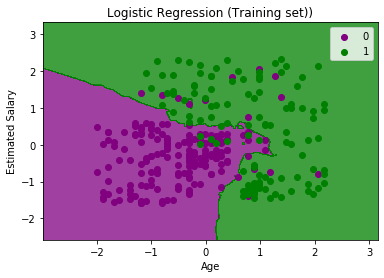

In [131]:
#Visualizing the training set result  

x_set,y_set= x_train,y_train
x1,x2= np.meshgrid(np.arange(start=x_set[:,0].min() -1,stop= x_set[:,0].max()+1,step= 0.01),
                   np.arange(start=x_set[:,1].min() -1,stop= x_set[:,1].max()+1,step= 0.01))
plt.contourf(x1,x2,cls.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))          


plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  

for  i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
    
plt.title('Logistic Regression (Training set))')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show() 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


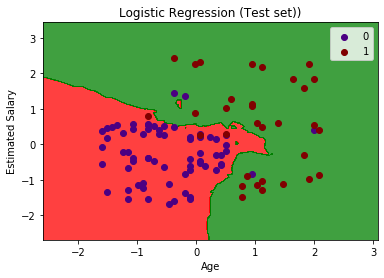

In [132]:
#Visulaizing the test set result  

x_set,y_set= x_test,y_test
x1,x2= np.meshgrid(np.arange(start=x_set[:,0].min() -1,stop= x_set[:,0].max()+1,step= 0.01),
                   np.arange(start=x_set[:,1].min() -1,stop= x_set[:,1].max()+1,step= 0.01))

plt.contourf(x1,x2,cls.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))          


plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  

for  i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('indigo', 'maroon'))(i), label = j)  
    
plt.title('Logistic Regression (Test set))')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

In [133]:
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [151]:
print(x_test)

[[-0.54748976  0.5130727 ]
 [ 0.15442019 -0.61825566]
 [-0.10879604  0.14615539]
 [-0.54748976  0.26846116]
 [-0.10879604 -0.61825566]
 [-0.81070599 -1.53554892]
 [-0.45975102 -1.68843113]
 [-0.0210573   2.25592989]
 [-1.60035469 -0.0678797 ]
 [ 0.94406888 -0.83229075]
 [-0.54748976 -0.6488321 ]
 [-0.72296725 -0.46537345]
 [ 0.06668145 -0.46537345]
 [ 0.24215893  0.20730828]
 [-1.4248772   0.48249625]
 [-0.37201227  1.43036596]
 [ 0.06668145  0.20730828]
 [-1.51261594  0.45191981]
 [ 1.64597884  1.8278597 ]
 [-0.10879604 -1.47439603]
 [-0.10879604 -0.70998498]
 [ 0.94406888  2.25592989]
 [ 0.41763642 -0.58767922]
 [ 0.94406888  1.06344865]
 [-1.16166097 -1.29093738]
 [ 1.11954637  2.16420057]
 [-0.72296725  0.5130727 ]
 [-0.63522851  0.2990376 ]
 [ 0.06668145 -0.25133835]
 [-0.37201227  0.48249625]
 [-1.33713846  0.54364914]
 [ 0.06668145  0.26846116]
 [ 1.82145632 -0.31249124]
 [ 0.06668145 -0.52652633]
 [-1.07392223 -0.37364412]
 [-1.60035469 -0.55710277]
 [-1.24939971  0.32961404]
 

In [170]:
y_pred=cls.predict(st.fit_transform([[27,39043284]]))
print(y_pred)

[0]
